In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import random
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV


import warnings
warnings.simplefilter("ignore")

**Говорова Диана, 23.М08-мм**

**Задание 2: **


- [X] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин (целевой признак для предсказания --- price).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- [X] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- [X] Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.
- [X] При обучении моделей использовать масштабирование данных.
- [X] Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [X] Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R^2
- [X] Обучить модель, используя существующую библиотеку. Например, в sklearn для регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.
- [X] Повторить тоже самое, но используя кросс-валидацию.
- [X] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.
- [X] (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.
- [X] (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [X] (+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.
- [X] (+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

**DataFrame Perth_house:**
- ADDRESS - адрес улицы
- SUBURB - название пригорода
- PRICE - Цена на дату последней продажи
- BEDROOMS - Количество спален
- BATHROOMS - Количество ванных комнат
- GARAGE - Количество гаражей/машиномест
- LAND_AREA - Площадь земельного участка в квадратных метрах
- FLOOR_AREA - Площадь помещения в квадратных метрах
- BUILD_YEAR - Год постройки дома
- CBD_DIST - Расстояние до Центральный деловой район
- NEAREST_STN - Ближайшая железнодорожная станция
- NEAREST_STN_DIST - Расстояние до ближайшей железнодорожной станции
- DATE_SOLD - Дата последней продажи недвижимости
- POSTCODE - Почтовый индекс пригорода
- LATITUDE - Широта адреса
- LONGITUDE - Долгота адреса
- NEAREST_SCH - Ближайшая школа, подходящая для ATAR
- NEAREST_SCH_DIST - Расстояние до ближайшей школы, соответствующей требованиям ATAR
- NEAREST_SCH_RANK - Ранг школы, подходящей для ATAR

In [2]:
df=pd.read_csv(r'C:\Users\diana\ML MAG 1 SEM\Task 2/Perth_house.csv')
df.head(3)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [4]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [5]:
df.shape

(33656, 19)

In [6]:
#Посмотрим количество нулевых значений в каждом столбце
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

Видим что у нас много пропущенных значений в трех столбцах : 
    1.Количество гаражей/машиномест
    2.Год постройки дома
    3.Ранг школы, подходящей для ATAR
    
    
Если проблема с пропусками значений по кол-ву гаражей можно решить, заполнив значения 0, то с годом постройки 
дома и рейтингом школы все сложнее. Так как данных у нас довольно много, можно просто убрать строки с пропущенными
значениями этих признаков. Так как заполнение средними значениями или создание какого-либо другого алгоритма заполнения 
может плохо сказаться на дальнейшем построении модели регрессии ввиду неточных значений.

Проведем Data Cleaning

Заполним пропущенные значения кол-ва гаражей 0 и удалим строки, где есть хоть одно пропущенное значение

In [7]:
df['GARAGE'] = df['GARAGE'].fillna(0)
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(20692, 19)

Теперь разобьем дату продажи на месяц и год. Также удалим почтовый индекс, для предсказания он не нужен но может спутать нашу модель так как имеет числовой тип

In [8]:
df[['MONTH_OF_SOLD', 'YEAR_OF_SOLD']] = df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
df.drop(['DATE_SOLD'],axis=1,inplace=True)

df.drop(['POSTCODE'],axis=1,inplace=True)

Построим графики распределения данных каждого параметра

array([[<AxesSubplot:title={'center':'YEAR_OF_SOLD'}>]], dtype=object)

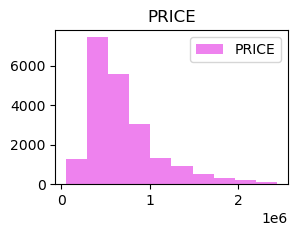

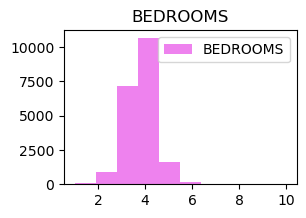

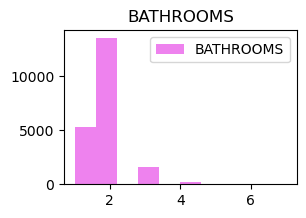

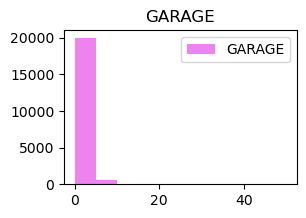

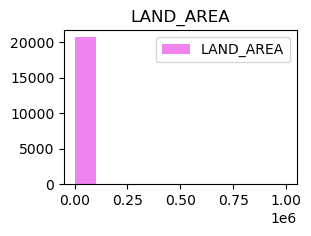

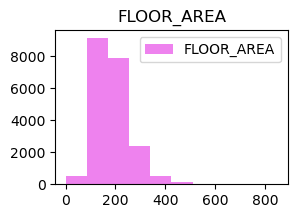

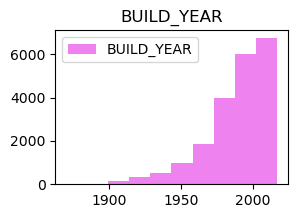

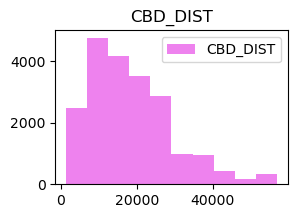

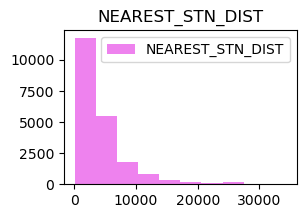

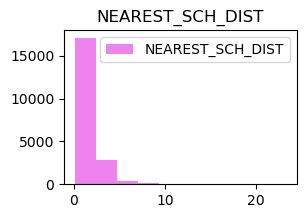

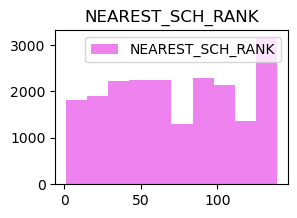

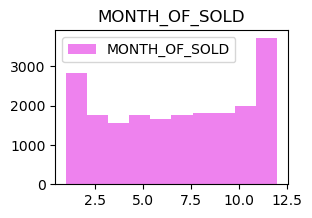

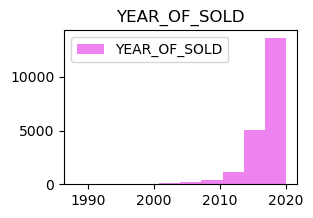

In [9]:
df.hist(column='PRICE', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='BEDROOMS', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='BATHROOMS', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='GARAGE', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='LAND_AREA', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='FLOOR_AREA', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='BUILD_YEAR', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='CBD_DIST', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='NEAREST_STN_DIST', figsize = (3, 2), legend = True, grid = False, color = 'violet')

df.hist(column='NEAREST_SCH_DIST', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='NEAREST_SCH_RANK', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='MONTH_OF_SOLD', figsize = (3, 2), legend = True, grid = False, color = 'violet')
df.hist(column='YEAR_OF_SOLD', figsize = (3, 2), legend = True, grid = False, color = 'violet')


Построим график корреляции параметров

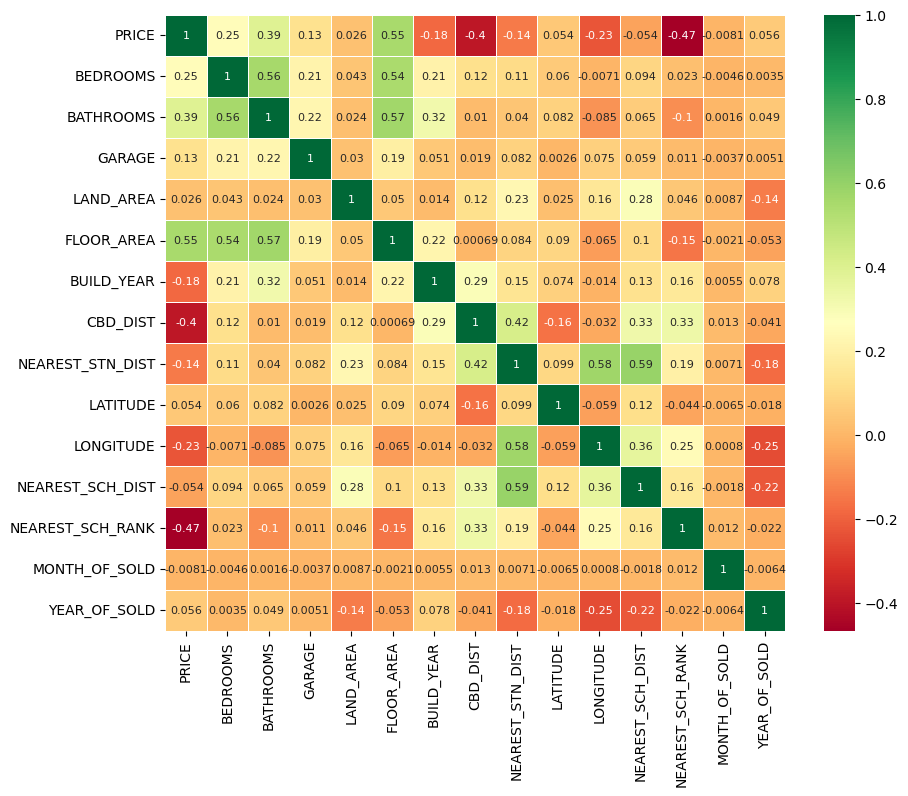

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.5, annot_kws={'size':8})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Видим, что большой корреляцией обладают параметры : 
- кол-во спален и кол-во ванных комнат;
- кол-во спален и площадь дома;
- кол-во ванных комнат и площадь дома;
- расстояние до центра и расстояние до ближайшей жд станции;
- расстояние до ближайшей жд станции и расстояние до ближайшей школы; 
- расстояние до ближайшей жд станции и долгота;
- долгота и год продажи;
- расстояние до ближайшей школы и долгота;
- расстояние до ближайшей школы и год продажи;

Можно убрать параметры долготу, широту, расстояние до ближайшей школы, площадь дома чтобы не было переобучения

In [11]:
df.drop(['NEAREST_SCH_DIST'],axis=1,inplace=True)
#df.drop(['FLOOR_AREA'],axis=1,inplace=True)
df.drop(['LONGITUDE'],axis=1,inplace=True)
df.drop(['LATITUDE'],axis=1,inplace=True)

Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [12]:
y = df["PRICE"]
X = df.drop(columns=["PRICE"])

numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

X = X[numeric_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14484, 11)
(6208, 11)
(14484,)
(6208,)


При обучении моделей использовать масштабирование данных.

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

(+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.

In [15]:
# RFECV позволяет выбрать оптимальное количество признаков кросс-валидацией
model = LinearRegression()

rfecv = RFECV(model, step=1, cv=5, scoring='neg_root_mean_squared_error')
rfecv.fit(X_train_scaled, y_train)

optimal_features = rfecv.n_features_
selected_features = list(X.columns[rfecv.support_])
print('Optimal number of features : %d' % rfecv.n_features_)
print('Optimal features : %s' % selected_features)


Optimal number of features : 9
Optimal features : ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_SCH_RANK', 'YEAR_OF_SOLD']


In [16]:
X_train_scaled = X_train_scaled[:,rfecv.support_]
X_test_scaled = X_test_scaled[:,rfecv.support_]

(+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

In [17]:
# Сетка гиперпараметров
model = Ridge()

alpha_p = np.logspace(-5, 5, 10)
tol_p = np.logspace(-5, 5, 10)


param_grid = {
    'alpha': alpha_p,
    'tol': tol_p
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Лучшие гиперпараметры
lmbda = grid_search.best_params_['alpha']
learning_rate = grid_search.best_params_['tol']
'Optimal parameters : %s' % grid_search.best_params_

"Optimal parameters : {'alpha': 0.2782559402207126, 'tol': 1e-05}"

In [18]:
#Добавление столбца с 1
def prepare_x(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))


Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [19]:
iterations_1 = 1000
learning_rate_1 = 0.25
lmbda = 0.0001

In [20]:
def gradient_descent(X, y,  learning_rate, iterations, lmbda):
    m, n = X.shape
    w = np.zeros(n)
    # проходим по всем итерациям градиентного спуска
    for i in range(iterations):
        # вычисляем градиент функционала с L2-регуляризацией
        error = np.dot(X, w) - y
        gradient = (2 / m) * np.dot(X.T, error) + 2 * lmbda * w
        # обновляем веса
        w -= learning_rate * gradient
        
    return w

Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R^2

In [21]:
# добавляем столбец единиц для учета свободного члена
X_train_scaled_prepared = prepare_x(X_train_scaled)
X_test_scaled_prepared = prepare_x(X_test_scaled)


weights = gradient_descent(X_train_scaled_prepared, y_train,  learning_rate_1, iterations_1, lmbda)


# предсказание на обучающей выборке
y_train_pred = np.dot(X_train_scaled_prepared, weights)


# предсказание на тестовой выборке
y_test_pred = np.dot(X_test_scaled_prepared, weights)

print('Gradient_descent')
print('R2-score на обучающей выборке:', r2_score(y_train, y_train_pred))
print('MSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=False), 3))
print('RMSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=True), 3))
print('R2-score на тестовой выборке:', r2_score(y_test, y_test_pred))
print('MSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=False), 3))
print('RMSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=True), 3))


Gradient_descent
R2-score на обучающей выборке: 0.5928110931828596
MSE на обучающей выборке: 250274.562
RMSE на обучающей выборке: 62637356260.501
R2-score на тестовой выборке: 0.5795638894854119
MSE на тестовой выборке: 247053.369
RMSE на тестовой выборке: 61035367100.928


Обучить модель, используя существующую библиотеку. Например, в sklearn для регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.

In [22]:
model = Ridge()  # выбранная модель

model.fit(X_train_scaled, y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train_scaled)  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test_scaled)  #на тестовой выборке

print("Ridge")
print('R2-score на обучающей выборке:', r2_score(y_train, y_train_pred))
print('MSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=False), 3))
print('RMSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=True), 3))
print('R2-score на тестовой выборке:', r2_score(y_test, y_test_pred))
print('MSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=False), 3))
print('RMSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=True), 3))


Ridge
R2-score на обучающей выборке: 0.5975213938532886
MSE на обучающей выборке: 248822.782
RMSE на обучающей выборке: 61912776645.86
R2-score на тестовой выборке: 0.5808794092876297
MSE на тестовой выборке: 246666.558
RMSE на тестовой выборке: 60844391035.722


(+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

In [23]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, lmbda):
    m, n = X.shape
    w = np.zeros(n)
    # проходим по всем итерациям градиентного спуска
    for i in range(iterations):
        for j in range(m):
            #выбираем рандомный элемент
            random_index = np.random.randint(m)
            xi = X[random_index] 
            yi = y[random_index] 
            
            # вычисляем градиент функционала с L2-регуляризацией
            gradient = 2 *  xi * (np.dot(xi, w) - yi) + 2 * lmbda * w
            
            # обновляем веса
            w -= learning_rate * gradient
        
    return w

In [24]:
learning_rate_2 = 0.01
iterations_2 = 100

# Обучим модель stochastic_gradient_descent
weights = stochastic_gradient_descent(X_train_scaled_prepared, y_train,  learning_rate_2, iterations_2, lmbda)
print(weights) 

# предсказание на обучающей выборке
y_train_pred = np.dot(X_train_scaled_prepared, weights)

print(y_train_pred[:5])
print(y_train[:5])

# предсказание на тестовой выборке
y_test_pred = np.dot(X_test_scaled_prepared, weights)

print('Stochastic_gradient_descent')
print('R2-score на обучающей выборке:', r2_score(y_train, y_train_pred))
print('MSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=False), 3))
print('RMSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=True), 3))
print('R2-score на тестовой выборке:', r2_score(y_test, y_test_pred))
print('MSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=False), 3))
print('RMSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=True), 3))


[ 668830.97963325 -181327.60940352  574155.25588065  388599.28911674
  924858.02468463 2087420.13097161 -538116.26397638 -476420.17193863
 -305539.78106553  321327.33119889]
[ 665369.72110673  791463.64543055 1299268.98749039  842871.09052808
  436094.64945374]
[ 524000  273500 1500000  675000  387500]
Stochastic_gradient_descent
R2-score на обучающей выборке: 0.5828760261173684
MSE на обучающей выборке: 253309.406
RMSE на обучающей выборке: 64165655103.702
R2-score на тестовой выборке: 0.5650070589053215
MSE на тестовой выборке: 251293.862
RMSE на тестовой выборке: 63148604941.499


(+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [25]:
def mini_batch_gradient_descent(X, y, learning_rate, iterations, lmbda, batch_size):
    # проходим по всем итерациям градиентного спуска
    num_batches = int(len(X) / batch_size)
    m, n = X.shape
    w = np.zeros(n)
    for i in range(iterations):
        #перемешиваем индексы
        index = np.random.permutation(m)
        X_shuffled = X[index]
        y_shuffled = y[index]

        for i in range(num_batches):
            X_batch = X_shuffled[i*batch_size:(i+1)*batch_size]
            y_batch = y_shuffled[i*batch_size:(i+1)*batch_size]
            
            y_pred = np.dot(X_batch, w)
            
            gradient = (1/batch_size) * (X_batch.T.dot(y_pred - y_batch)) + (lmbda/m) * w
            
            #gradient = (1/batch_size) * np.dot(X_batch.T, np.dot(X_batch, w) - y_batch) +  (decay/batch_size) * w
            w -= learning_rate * gradient
            
    return w


In [26]:
batch_size = 30
# Обучим модель mini_batch_gradient_descent 
weights = mini_batch_gradient_descent(X_train_scaled_prepared, y_train,  learning_rate_2, iterations_2, lmbda, batch_size)
print(weights)

# предсказание на обучающей выборке
y_train_pred = np.dot(X_train_scaled_prepared, weights)

print(y_train_pred[:5])
print(y_train[:5])

# предсказание на тестовой выборке
y_test_pred = np.dot(X_test_scaled_prepared, weights)

print()
print('R2-score на обучающей выборке:', r2_score(y_train, y_train_pred))
print('MSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=False), 3))
print('RMSE на обучающей выборке:', round(mean_squared_error(y_train, y_train_pred, squared=True), 3))
print('R2-score на тестовой выборке:', r2_score(y_test, y_test_pred))
print('MSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=False), 3))
print('RMSE на тестовой выборке:', round(mean_squared_error(y_test, y_test_pred, squared=True), 3))


[ 726647.28430443   49970.96143948  609270.37926068  175822.83558573
  195201.86257205 1850556.77674004 -594703.90224699 -490613.80301272
 -349142.46385256  286553.89187002]
[ 651123.60039147  752304.0915551  1252467.7099006   790449.98544654
  437824.23889637]
[ 524000  273500 1500000  675000  387500]

R2-score на обучающей выборке: 0.5923044075081858
MSE на обучающей выборке: 250430.228
RMSE на обучающей выборке: 62715299079.142
R2-score на тестовой выборке: 0.578590248700501
MSE на тестовой выборке: 247339.265
RMSE на тестовой выборке: 61176712055.002


- Повторить тоже самое, но используя кросс-валидацию.
- Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [27]:
#кросс-валидация для gradient_descent

error_table = pd.DataFrame(index=["mse-train", "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])
kf = KFold(n_splits=5)
splited = kf.split(X=X_train_scaled, y=y_train)


for fold, (train_ind, test_ind) in enumerate(splited):
    x_train_tmp = X_train_scaled[train_ind, :]
    x_test_tmp = X_train_scaled[test_ind, :]
    y_train_tmp = y_train[train_ind]
    y_test_tmp = y_train[test_ind]
    
    weight = gradient_descent(x_train_tmp, y_train_tmp, learning_rate_1, iterations_1, lmbda)
    
    y_pred_train_tmp = np.dot(x_train_tmp, weight)
    y_pred_test_tmp = np.dot(x_test_tmp, weight)
    
    
    # оценка качества с помощью кросс-валидации
    mse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=True)
    mse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=True)
    rmse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=False)
    rmse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=False)
    r2_scores_train = r2_score(y_train_tmp, y_pred_train_tmp)
    r2_scores_test = r2_score(y_test_tmp, y_pred_test_tmp)

    error_table.insert(loc=fold, column=f"Fold{fold + 1}", value=[
        mse_scores_train, mse_scores_test, rmse_scores_train, rmse_scores_test, r2_scores_train, r2_scores_test
    ])

    
error_table["E"] = error_table.mean(axis=1)
error_table["STD"] = error_table.std(axis=1)

error_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,6.755336e+10,6.653254e+10,6.853813e+10,6.779671e+10,6.638713e+10,6.736158e+10,8.058834e+08
mse-test,6.691658e+10,7.051471e+10,6.289145e+10,6.573691e+10,7.132097e+10,6.747612e+10,3.110404e+09
rmse-train,2.599103e+05,2.579390e+05,2.617979e+05,2.603780e+05,2.576570e+05,2.595364e+05,1.552168e+03
rmse-test,2.586824e+05,2.655461e+05,2.507817e+05,2.563921e+05,2.670599e+05,2.596924e+05,5.997633e+03
r2-train,5.627336e-01,5.632173e-01,5.534694e-01,5.637688e-01,5.672658e-01,5.620910e-01,4.595810e-03
r2-test,5.570381e-01,5.588394e-01,5.946418e-01,5.542205e-01,5.411767e-01,5.611833e-01,1.783756e-02


In [28]:
error_table = pd.DataFrame(index=["mse-train", "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])
kf = KFold(n_splits=5)
splited = kf.split(X=X_train_scaled, y=y_train)

#кросс-валидация для stochastic_gradient_descent
for fold, (train_ind, test_ind) in enumerate(splited):
    x_train_tmp = X_train_scaled[train_ind, :]
    x_test_tmp = X_train_scaled[test_ind, :]
    y_train_tmp = y_train[train_ind]
    y_test_tmp = y_train[test_ind]
    
    weight = stochastic_gradient_descent(x_train_tmp, y_train_tmp, learning_rate_2, iterations_2, lmbda)
    
    y_pred_train_tmp = np.dot(x_train_tmp, weight)
    y_pred_test_tmp = np.dot(x_test_tmp, weight)
    
    
    # оценка качества с помощью кросс-валидации
    mse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=True)
    mse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=True)
    rmse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=False)
    rmse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=False)
    r2_scores_train = r2_score(y_train_tmp, y_pred_train_tmp)
    r2_scores_test = r2_score(y_test_tmp, y_pred_test_tmp)

    error_table.insert(loc=fold, column=f"Fold{fold + 1}", value=[
        mse_scores_train, mse_scores_test, rmse_scores_train, rmse_scores_test, r2_scores_train, r2_scores_test
    ])

error_table["E"] = error_table.mean(axis=1)
error_table["STD"] = error_table.std(axis=1)   

error_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,6.671939e+10,6.877051e+10,6.815724e+10,7.690851e+10,6.848561e+10,6.980825e+10,3.619581e+09
mse-test,6.563494e+10,7.525363e+10,6.261942e+10,7.396057e+10,7.325824e+10,7.014536e+10,5.046265e+09
rmse-train,2.583010e+05,2.622413e+05,2.610694e+05,2.773238e+05,2.616976e+05,2.641266e+05,6.736555e+03
rmse-test,2.561932e+05,2.743239e+05,2.502387e+05,2.719569e+05,2.706626e+05,2.646751e+05,9.615898e+03
r2-train,5.681318e-01,5.485252e-01,5.559509e-01,5.051399e-01,5.535872e-01,5.462670e-01,2.154980e-02
r2-test,5.655221e-01,5.291914e-01,5.963952e-01,4.984537e-01,5.287138e-01,5.436552e-01,3.386823e-02


In [29]:
error_table = pd.DataFrame(index=["mse-train", "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])
kf = KFold(n_splits=5)
splited = kf.split(X=X_train_scaled, y=y_train)



#кросс-валидация для mini_batch_gradient_descent
for fold, (train_ind, test_ind) in enumerate(splited):
    x_train_tmp = X_train_scaled[train_ind, :]
    x_test_tmp = X_train_scaled[test_ind, :]
    y_train_tmp = y_train[train_ind]
    y_test_tmp = y_train[test_ind]
    
    weight = mini_batch_gradient_descent(x_train_tmp, y_train_tmp, learning_rate_2, iterations_2, lmbda, batch_size)
    
    y_pred_train_tmp = np.dot(x_train_tmp, weight)
    y_pred_test_tmp = np.dot(x_test_tmp, weight)
    
    
    # оценка качества с помощью кросс-валидации
    mse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=True)
    mse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=True)
    rmse_scores_train = mean_squared_error(y_train_tmp, y_pred_train_tmp, squared=False)
    rmse_scores_test = mean_squared_error(y_test_tmp, y_pred_test_tmp, squared=False)
    r2_scores_train = r2_score(y_train_tmp, y_pred_train_tmp)
    r2_scores_test = r2_score(y_test_tmp, y_pred_test_tmp)

    error_table.insert(loc=fold, column=f"Fold{fold + 1}", value=[
        mse_scores_train, mse_scores_test, rmse_scores_train, rmse_scores_test, r2_scores_train, r2_scores_test
    ])

error_table["E"] = error_table.mean(axis=1)
error_table["STD"] = error_table.std(axis=1)   

error_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,6.789756e+10,6.691373e+10,6.889977e+10,6.814354e+10,6.673542e+10,6.771800e+10,8.027717e+08
mse-test,6.738562e+10,7.079804e+10,6.337862e+10,6.614499e+10,7.159651e+10,6.786076e+10,3.027957e+09
rmse-train,2.605716e+05,2.586769e+05,2.624877e+05,2.610432e+05,2.583320e+05,2.602223e+05,1.542026e+03
rmse-test,2.595874e+05,2.660790e+05,2.517511e+05,2.571867e+05,2.675752e+05,2.604359e+05,5.822675e+03
r2-train,5.605057e-01,5.607148e-01,5.511133e-01,5.615372e-01,5.649955e-01,5.597733e-01,4.621723e-03
r2-test,5.539332e-01,5.570668e-01,5.915018e-01,5.514532e-01,5.394041e-01,5.586718e-01,1.747107e-02


In [30]:
model = Ridge()
error_table = pd.DataFrame(index=["mse-train", "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])


mse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
mse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
rmse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
r2_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
r2_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="r2")

for fold_i in range(5):
    error_table.insert(loc=fold_i, column=f"Fold{fold_i + 1}", value=[
        -mse_scores_train[fold_i], -mse_scores_test[fold_i], -rmse_scores_train[fold_i], -rmse_scores_test[fold_i], r2_scores_train[fold_i], r2_scores_test[fold_i]
    ])
    
error_table["E"] = error_table.mean(axis=1)
error_table["STD"] = error_table.std(axis=1)   

error_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,6.092298e+10,6.683585e+10,5.799591e+10,6.057061e+10,6.437009e+10,6.213909e+10,3.102963e+09
mse-test,6.277414e+10,5.844697e+10,6.113199e+10,6.585292e+10,5.928553e+10,6.149831e+10,2.643166e+09
rmse-train,2.468258e+05,2.585263e+05,2.408234e+05,2.461110e+05,2.537126e+05,2.491998e+05,6.207897e+03
rmse-test,2.505477e+05,2.417581e+05,2.472488e+05,2.566182e+05,2.434862e+05,2.479318e+05,5.303614e+03
r2-train,5.967134e-01,5.818555e-01,6.261953e-01,5.892546e-01,5.858933e-01,5.959824e-01,1.587438e-02
r2-test,5.781226e-01,6.086006e-01,5.711141e-01,5.606612e-01,5.606618e-01,5.758320e-01,1.767243e-02


**Вывод:**
Реализованные модели линейной регрессии с градиентным спуском, стохастическим градиентным спуском и мини-пакетным градиентным спуском практически совпадают с библиотечной моделью.